# Linear Regression with Gradient Descent
In regression learning, we take a set of $n$ data points generated by some unknown function $f$ and try to infer a hypothesis function $h$ that is similar to $f$.

In linear regression learning, we try to approximate $f$ using a linear function $h(x) = w_0 + w_1x_1 + w_2x_2 + ... w_kx_k$. where $x = [x_1, x_2, ..., x_k]$ is a vector of real-numbered features and $w = [w_0, w_1, ..., w_k]$ is a vector of real-numbered weights given to each feature.

For example, suppose you want to predict the market price of a house given some data like "number of bathrooms", "square-footage", and "age". You can model a house as a vector $[x_1, x_2, x_3]$ where $x_1$ is "number of bathrooms", $x_2$ is "square-footage", and "x_3" is age.

If we assume that the there is a linear relationship between these features and the market price of a house, then each feature must have some coefficient, or weight. A weight serves 2 purposes: it multiplies the relative effect of especially important features and normalizes quantities of different scales.

For example, "age" will always be a much smaller number than "square-footage" but it might be more important in predicting the market price. In that case "age" might have a large negative weight to emphasize its importance and bring its relative magnitude closer to "square-footage". The feature "square-footage" might have a small positive coefficient so as not to overstate its importance to market price just because of its large magnitude.

To make the math simpler, we'll introduce a dummy constant $x_0 = 1$ so our hypotheses will have the form $h(x) = w_0x_0 + w_1x_1 + ... + w_kx_k$. That way we can can represent $h$ as the dot product of 2 vectors $x$ and $w$.

In order to write a program that can learn a good hypothesis from data, we need 2 components:
* Precise criteria for determining the quality of a hypothesis.
* An algorithm that improves the quality of a hypothesis.

## The Loss Function
A loss function is metric for how wrong a hypothesis is. If we think of a learning program as a utility-maximizing agent, then learning is the process of minimizing loss.

It's up to us how define loss. We'll use the root-mean-squared error loss function since it's traditional for linear regression.

$$L(h_w) = \sqrt({1 \over n} \sum_{i=1}^n (y_i - h_w(x_i))^2)$$

Squared-error loss  gives disproportionately large penalties to large errors. If being off by 10 is more than twice as bad as being off by 5, then squared-error is a good choice of loss function.

In [36]:
import numpy as np
import math

# X is a sequence of n feature vectors, or an n x k matrix. Y is a sequence of output values, or an n-vector.
# W is a weight-vector.
# The loss function is a closure over the example set.
def root_mean_squared_error(X,Y):
    n, k = X.shape
    def rmse(W):
        err = np.sum((Y - np.matmul(X,W)) ** 2)
        return math.sqrt(err / n)
    return rmse

Now that we have a metric for how wrong a hypothesis, we can say that a correct hypothesis $h_w$ is one for which $L(h_w) = 0$. In other words, our learning problem is reduced to finding the weight vector $w^*$ that minimizes $L(h_w)$.

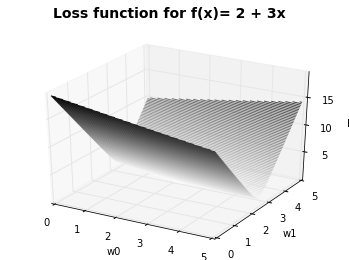

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# Create 50 examples generated by f.
X0 = np.repeat(1,50)
X1 = np.linspace(0,10)
X = np.array([X0,X1]).T
F = np.array([2,3])
Y = np.matmul(X,F)
L = root_mean_squared_error(X,Y)

# Create a sample of the weight space.
_w0 = np.linspace(0,5)
_w1 = np.linspace(0,5)
W0, W1 = np.meshgrid(_w0,_w1)

LOSS = []
for i in range(_w0.size):
    row = []
    for j in range(_w0.size):
        w0 = W0[i,j]
        w1 = W1[i,j]
        loss = L(np.array([w0,w1]))
        row.append(loss)
    LOSS.append(row)
LOSS = np.array(LOSS)    
    
lossGraph = plt.figure()
ax = plt.axes(projection = '3d')
ax.contour3D(W0, W1, LOSS, 100, cmap='binary')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('L')
lossGraph.suptitle('Loss function for f(x)= 2 + 3x', fontsize=14, fontweight='bold')
plt.show()    

The root-mean-squared error function of a linear functions is always convex, meaning the only minimum is the global minimum. In the example above, the minimum occurs at $w = [2,3]$

## Minimizing Loss with the Gradient Descent Algorithm
Squared-error loss and absolute-value loss are both convex for linear functions, meaning the only local minimum is the global minimum.

That means $L(h_w)$ is mimimized at the unique point where ${\delta \over \delta w_j} L(h_w) = 0$ for all $w_j$.

We can approximate $w_*$ with a simple algorithm called gradient descent: 

1. Start with an arbitrary weight vector $w$ and compute $\Delta_j = {\delta \over \delta w_j} L(h_w)$.
2. Set $w_j := w_j - \alpha \Delta_j$ where $\alpha$ is a constant called the learning rate.
3. Repeat until convergence.

The intuition is that for each weight $w_j$, the graident $\Delta_j$ tells us where $w_j$ is relative to $w^*_j$. If the gradient is negative, then $w^*_j > w_j$ so $w_j$ must be increased. If gradient is positive, then $w_j > w^*_j$ so $w_j$ must be decreased. The algorithm is called gradient descent because at each step we move down the gradient of the loss function.

There are 2 points of ambiguity in the algorithm, choosing $\alpha$ and determining convergence.

If $\alpha$ is too large, the algorithm might overshoot the minimum, diverge, and never terminate. If $\alpha$ is too small, the algorithm might not terminate in a finite number of steps. In most cases it will not be possible to determine $w^*$ in a reasonable number of steps so we'll need to approximate $w^*$.

The simplest way to do this is to run gradient descent for a pre-determined number of iterations, say 1000. This way, gradient descent will always terminate, but we may lose a lot of precision if we have a good value for $\alpha$.

We can also approximate convegence by setting a threshold $\omega$. If the algorithm is converging, then the difference in loss between steps will decrease with each iteration. If the difference is loss between steps is less than $\omega$ we terminate the algorithm because further iterations won't give us a much better result. This method will give better results if we have a good value for $\alpha$, but it will not terminate if $\alpha$ is too small or too large.

In the case of root-mean-squared error, $\Delta_j = -{2 \over n} \sum_{i=1}^n x_{i,j} (y_i - h_w(x))$ so our update rule is:

$$w_j := w_j + {2 \alpha \over n } \sum_{i=1}^n x_{i,j} (y_i - h_w(x))$$

If we want to, we can fold the $2 \over n$ factor into $\alpha$.

In [77]:
import numpy as np

# The update function is a closure over X, Y, and alpha.
def root_mean_squared_update(X,Y,alpha):
    n, k = X.shape    
    def update(W):
        ERR = np.matmul(X.T,(Y - np.matmul(X,W)))    
        return W + ((2 * alpha / n) * ERR)
    return update
        

## Implementing Gradient Descent

In [94]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X,Y,alpha,omega = None):
    n, k = X.shape
    L = root_mean_squared_error(X,Y)
    update = root_mean_squared_update(X,Y,alpha)
    W = np.repeat(0,k)
    if omega == None:
        for s in range(1000):
            W = update(W)
    else:
        loss = L(W)
        while True:
            W = update(W)
            newLoss = L(W)
            if abs(newLoss - loss) < omega:
                break
            else:
                loss = newLoss
    return W

# Utility function for fitting univariate linear functions.
def fit_line(X1,Y,alpha,omega = None, ylow = None, yhigh = None):
    n = X1.size
    X0 = np.repeat(1,n)
    X = np.array([X0,X1]).T
    W = gradient_descent(X,Y,alpha,omega)
    w0, w1 = W[0], W[1]
    plt.scatter(X1,Y)
    if ylow != None and yhigh != None:
        plt.ylim(ylow,yhigh)
    H = w0 + w1 * X
    plt.plot(X,H,'red')
    print("weights", w0, w1)
    print("loss:", root_mean_squared_error(X,Y)(W))

## Evaluating Linear Regression on Known Functions
Here's the result of running gradient descent on an example set generated by $f(x) = 2 + 3x$.

weights 1.99611211402 3.0005816446
loss: 0.0019733384946666447


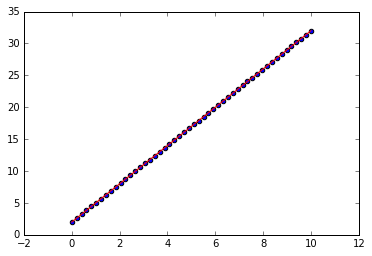

In [88]:
# Create 50 examples generated by f.
X = np.linspace(0,10)
Y = 2 + X1 * 3
alpha = 0.01
omega = 0.00001
fit_line(X,Y,alpha,omega)

Gradient descent approximates $f$ almost exactly. Here's the result when we change $f$ to $f(x) = 0 + 3x$:

weights 0.0038787447836 2.99941972296
loss: 0.0019686987796711693


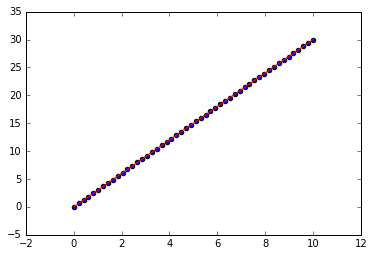

In [89]:
X = np.linspace(0,10)
Y = X1 * 3
alpha = 0.01
omega = 0.00001
fit_line(X,Y,alpha,omega)

Again, gradient descent gets a very close approximation of $f$. Here's the result when we change $f$ to $f(x) = 2 + 0x$:

weights 1.9961258565 0.000579588668702
loss: 0.0019663633501167213


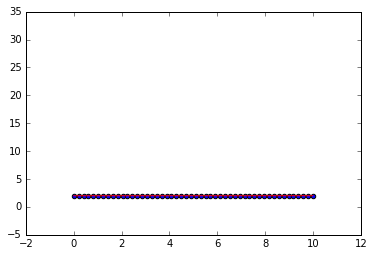

In [95]:
X = np.linspace(0,10)
Y = 2 + X * 0
alpha = 0.01
omega = 0.00001
fit_line(X,Y,alpha,omega,-5,35)

We can see that gradient descent performs well o non-stochastic functions even if some weights are not relevant to determining $f$. 

Gradient descent generalizes well to functions of several variables. Here's the result when $f(x) = 2 + 2x_1 + 3x_2 + x_3$ when the values of $x$ cover different intervals.

In [212]:
X = np.linspace(0,10)
X0 = np.repeat(1,50)
X1 = np.linspace(0,10)
X2 = np.linspace(100,150)
X3 = np.linspace(-25,10)
Y = 2 + 2 * X1 + 3 * X2 + X3
X = np.array([X0,X1,X2,X3]).T
alpha = 0.00001
omega = 0.00001
W = gradient_descent(X,Y,alpha,omega)
print("weights: ",W)
print("loss: ",root_mean_squared_error(X,Y)(W))

weights:  [ 0.0090559   0.43825192  3.09685003  1.3074841 ]
loss:  0.0038640772976427395


Gradient descent fits a consistent hypothesis, but doesn't quite distribute the weights correctly.

Consider a stochastic function where one of the features a random value from $[015,15]$ and $f = x_1 + 0x_2$.

In [331]:
import random
import numpy as np

X0 = np.repeat(1,50)
X1 = np.linspace(0,10)
X2 = np.array([random.uniform(-15,15) for i in range(50)])
X = np.array([X0,X1,X2]).T
Y = X1

alpha = 0.01
omega = 0.00001
W = gradient_descent(X,Y,alpha,omega)
print("weights: ", W)
print("loss: ", root_mean_squared_error(X,Y)(W))


weights:  [  3.92774608e-03   9.99420099e-01   2.02210751e-05]
loss:  0.0019854948658426835


Gradient descent correctly identifies that there is no correlation between $x_2$ and $y$.

## Using Linear Regression on Unknown Functions
To evaluate linear regression on an unkown function, we'll use U.S. Census data showing the county-level results in the 1992 election. 

The feature vector is:
* $x_1$ - Median Age (years)
* $x_2$ - Median Savings in Dollars
* $x_3$ - Per-Capita Income Dollars
* $x_4$ - Percent in Poverty
* $x_5$ - Percent Veterans
* $x_6$ - Percent Female
* $x_7$ - Population Density
* $x_8$ - Percent in Nursing Homes
* $x_9$ - Crime Index Per Capita

The output variable is the percentage of voters that voted for Bill Clinton.

To test the performance of gradient descent, we'll randomly shuffle the data into 2 equal sized disjoint sets. One set will be used to learn the hypothesis. The other set will be used to test the hypothesis. If the loss is similar on the training and test sets, then the hypothesis probably generalizes well.

In [346]:
import numpy as np
import pandas as pd
import random


DATA = pd.read_csv("election.csv").values
DATA = list(DATA)
random.shuffle(DATA)
DATA = np.array(DATA)
SPLITTED = np.array_split(DATA,2)
TRAIN = SPLITTED[0].T
TEST = SPLITTED[1].T

TRAIN_Y = TRAIN[0]
TRAIN_X = TRAIN[1:].T
TEST_Y = TEST[0]
TEST_X = TEST[1:].T

alpha = 0.00000000001
omega = 0.001
W = gradient_descent(TRAIN_X,TRAIN_Y,alpha,omega)
print("weights: ", W)
print("training set loss: ", root_mean_squared_error(TRAIN_X,TRAIN_Y)(W))
print("test set loss: ", root_mean_squared_error(TEST_X,TEST_Y)(W))

weights:  [  4.92863093e-06   9.85851229e-05   1.66253637e-03   4.28286000e-06
   1.43606294e-06   7.98422407e-06   4.69362080e-05   5.47203657e-07
   5.72478864e-05]
training set loss:  14.673437672816092
test set loss:  14.924118189083007
